# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/NSN/Downloads/traffic-signs-data/train.p'
testing_file  = '/Users/NSN/Downloads/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [9]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [2]:
#### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import csv
#from PIL import Image

%matplotlib inline

#Load label names for visualization
signnames = []
with open('signnames.csv', 'r') as csvfile:
    namereader = csv.reader(csvfile, delimiter=',')
    next(namereader, None)
    for row in namereader:
        signnames.append(row[1])  

In [3]:
# Visualization of the training and testing images

def view_traffic_signs(images,labels):

    rows=2
    cols=4
    selection = np.random.choice(images.shape[0], min(len(images),rows*cols), replace=False)

        
    images_to_show = images[selection]
    
    f, axarr = plt.subplots(rows, cols, figsize=(12, 3*rows))
    for row in range(rows):
        for col in range(cols):
            index = (row*cols)+col
            if index >= len(images_to_show):
                break
                
            ax = axarr[row,col] if rows > 1 else axarr[col]
            ax.imshow(images_to_show[index])
            ax.axis('off')
            
            
            label_id = labels[selection][index]
            ax.set_title('%s - %s' % (label_id, signnames[label_id]), fontsize=8)



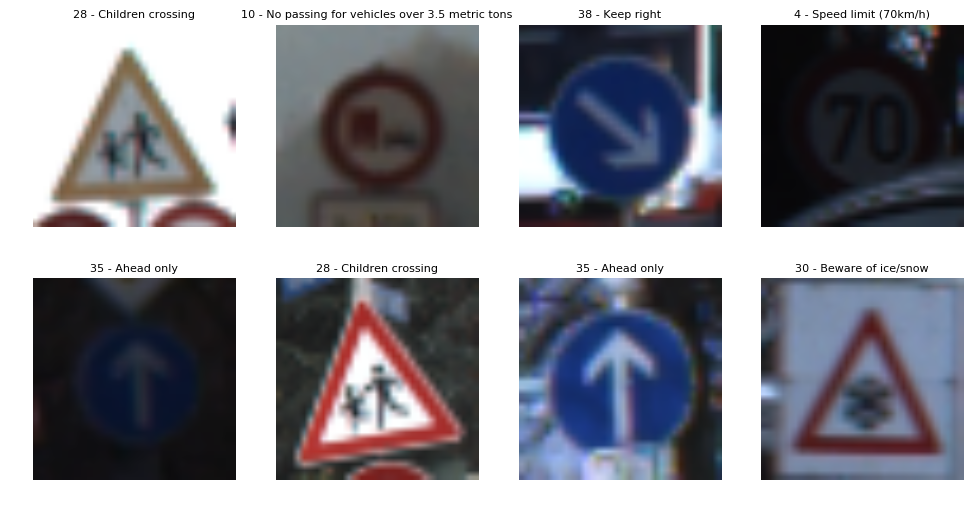

In [4]:
view_traffic_signs(X_train, y_train)

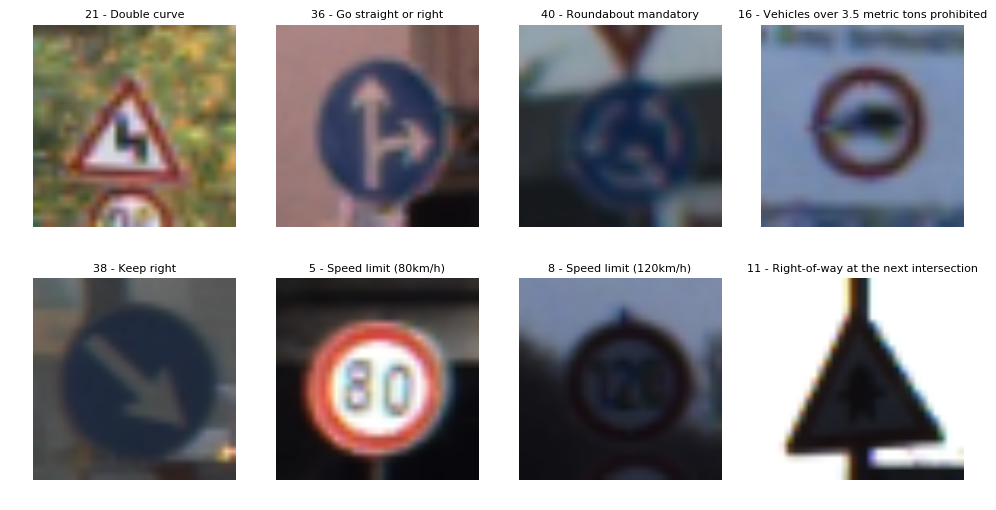

In [29]:
view_traffic_signs(X_test, y_test)

<function matplotlib.pyplot.show>

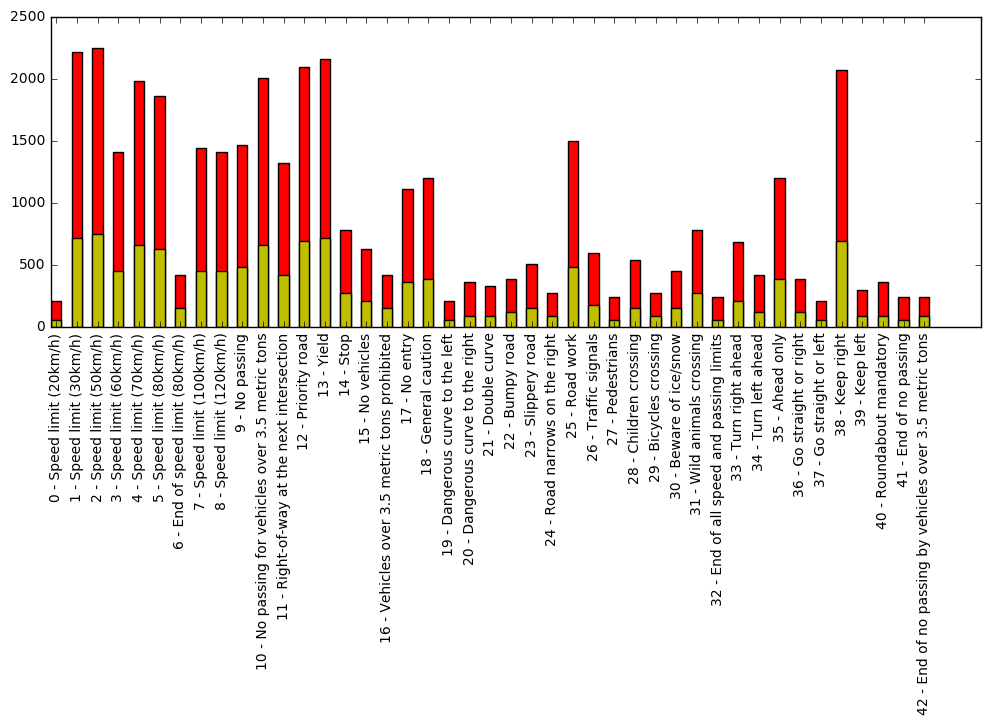

In [5]:
from collections import Counter

train_counter = Counter(y_train)
test_counter = Counter(y_test)

order = list(zip(*train_counter.most_common()))[0]
width=0.5
ind=np.arange(len(train_counter))

plt.figure(1)
plt.figure(figsize=(12,4))
p1=plt.bar(range(len(train_counter)),train_counter.values(),width,color='r')
p2=plt.bar(range(len(test_counter)),test_counter.values(),width,color='y')
plt.xticks(ind+width/2., ['%s - %s'% (i,signnames[i])for i in range(len(train_counter))],rotation=90)
plt.show

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [14]:
from sklearn.preprocessing import LabelBinarizer

# Normalization 
def normalize(img):
    out_min = 0.1
    out_max = 0.9
    greyscale_min = 0
    greyscale_max = 255
    
    a = (out_max - out_min)/( greyscale_max - greyscale_min )
    norm = a*(img.astype(np.float32) - greyscale_min) + out_min
    return norm 

# Converts picture to grayscale:
def grayscale(input_data):
    gray_image = cv2.cvtColor(input_data, cv2.COLOR_RGB2GRAY)
    return gray_image

# One Hot Encoded 
def oneHotEncode_labels(labels):
    encoder = LabelBinarizer()
    one_hot_encoded = encoder.fit_transform(labels)
    return one_hot_encoded

def the_preprocessor(input_data):
    images = []
    for i in range(input_data.shape[0]):
        images.append(grayscale(input_data[i]))
        images[i] = normalize(images[i])
    return np.reshape(np.asarray(images), [input_data.shape[0], 32, 32, 1])


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Preprocessing used:

1- Converting the images into grayscale. This helps in reducing the size of data and make processing faster. I have run the network both on coloured and grayscale images to see the effect on accuracry 

2- Normalizing the data between 0.1-0.9


In [32]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def transform_image(img,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

print('Success: transform_image function loaded.')

Success: transform_image function loaded.


In [15]:
# Preprocess the training data

#  For training using grayscale the function the_preprocessor is used
X_train_gray = the_preprocessor(X_train)

#  For training using coloured images the function normalize is used

X_train_norm = normalize(X_train)
y_train_OHE = oneHotEncode_labels(y_train)
X_test_norm = normalize(X_test)
y_test_OHE = oneHotEncode_labels(y_test)

print('Success: Training data preprocessed.')

Success: Training data preprocessed.


In [18]:
from sklearn.model_selection import train_test_split

train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_norm,
    y_train_OHE,
    test_size=0.05,
    random_state=0)

test_features = X_test_norm
test_labels = y_test_OHE

print("Shape of the training feature dataset:\n", train_features.shape)
print("Shape of the validation feature dataset:\n", valid_features.shape)
print("Shape of the test feature dataset:\n", test_features.shape)

Shape of the training feature dataset:
 (37248, 32, 32, 3)
Shape of the validation feature dataset:
 (1961, 32, 32, 3)
Shape of the test feature dataset:
 (12630, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

train_test_split from scikit-learn was used to split the data into training and validation set

Function has been defined for adding additional data but was not used in the final model as no effect was seen in the accuracy of the model.


In [23]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.metrics import confusion_matrix

def convolution_layer(input, weights, biases):
    layer = tf.nn.conv2d(input, filter=weights, strides=[1,1,1,1], padding='SAME')
    layer = tf.nn.bias_add(layer, biases)
    layer = tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    layer = tf.nn.relu(layer)
    return layer, weights

def fully_connected_layer(input, weights, biases, use_relu=True):
    layer = tf.nn.bias_add(tf.matmul(input, weights), biases)
    if use_relu:
        layer = tf.nn.relu(layer)
    return layer

def maxpool2d(input):
    
    return tf.nn.max_pool(input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                          padding='SAME')

def ConvNet_architecture(x, weights, biases, dropout):
    conv_filters = []
    
    conv1, filters_1 = convolution_layer(x, weights['conv1'], biases['conv1'])
    conv_filters.append(filters_1)
    
    conv2, filters_2 = convolution_layer(conv1, weights['conv2'], biases['conv2'])
    conv_filters.append(filters_2)
    
     # max_pool1=maxpool2d(conv2)
    
     # conv3, filters_3 = convolution_layer(max_pool1, weights['conv3'], biases['conv3'])
     # conv_filters.append(filters_3)
    
     # conv4, filters_4 = convolution_layer(conv3, weights['conv4'], biases['conv4'])
     # conv_filters.append(filters_4)
    
     # max_pool2=maxpool2d(conv4)
        
    flat_shape = conv2.get_shape()[1:4].num_elements()

    flattened = tf.reshape(conv2, [-1, flat_shape])
    
    #flat_shape = max_pool2.get_shape()[1:4].num_elements()

    #flattened = tf.reshape(max_pool2, [-1, flat_shape])
    
    fc1 = fully_connected_layer(flattened, weights['fc1'], biases['fc1'], use_relu=True)
    
    # Dropout:
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Output Layer:
    out = fully_connected_layer(fc1, weights['out'], biases['out'], use_relu=False)
    
    return out, conv_filters

In [24]:
# Defining the layer values:

weights = {
    'conv1': tf.Variable(tf.truncated_normal([3, 3, 3, 32], stddev=0.1)),
    'conv2': tf.Variable(tf.truncated_normal([3, 3, 32, 64], stddev=0.1)),
    #'conv3': tf.Variable(tf.truncated_normal([3, 3, 64, 64], stddev=0.1)),
    #'conv4': tf.Variable(tf.truncated_normal([3, 3, 64, 128], stddev=0.1)),
    #'fc1': tf.Variable(tf.truncated_normal([8192, 1024], stddev=0.1)),
    'fc1': tf.Variable(tf.truncated_normal([4096, 1024], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([1024, 43], stddev=0.1))
}

biases = {
    'conv1': tf.Variable(tf.zeros([32])),
    'conv2': tf.Variable(tf.zeros([64])),
    #'conv3': tf.Variable(tf.zeros([64])),
    #'conv4': tf.Variable(tf.zeros([128])),
    'fc1': tf.Variable(tf.zeros([1024])),
    'out': tf.Variable(tf.zeros([43]))
}

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture is:

For grayscale images netwrok

[Conv -> Relu -> Conv -> Relu -> Pool] * 2 -> Fully Connected -> ReLu -> Dropout -> Fully Connected


For coloured images network

[Conv -> Relu -> Pool] * 2 -> Fully Connected -> ReLu -> Dropout -> Fully Connected


Two different architecture were used for grayscale (bigger network) and coloured images (smaller network)


In [25]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Defining learning parameters:
learning_rate = 1e-3
epochs = 100
batch_size = 150
dropout = 0.75


# Inputs:
x_image = tf.placeholder(tf.float32, [None, 32, 32, 3])

y_true = tf.placeholder(tf.float32, [None, 43])
y_true_cls = tf.argmax(y_true, dimension=1)

keep_prob = tf.placeholder(tf.float32)

# Logits:
logits, filters = ConvNet_architecture(x_image, weights, biases, keep_prob)

y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

# Cost function:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y_true))

# Optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluating the model
correct_pred = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing variables
init = tf.initialize_all_variables()

saver = tf.train.Saver()

In [26]:
import math
from tqdm import tqdm

batch_count = int(math.ceil(len(train_features)/batch_size))

session = tf.Session()
session.run(init)

for epoch_i in range(epochs):
    batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
    for batch_i in batches_pbar:
    
        batch_start = batch_size*batch_i
        
        x_batch = train_features[batch_start:batch_start + batch_size]
        y_true_batch = train_labels[batch_start:batch_start + batch_size]
        
        feed_dict = {x_image: x_batch, y_true: y_true_batch, keep_prob: dropout}
        
        session.run(optimizer, feed_dict=feed_dict)
            
        valid_x_batch = valid_features[batch_start:batch_start + batch_size]
        valid_y_true_batch = valid_labels[batch_start:batch_start + batch_size]
        feed_dict_valid = {x_image: valid_x_batch, y_true: valid_y_true_batch, keep_prob: 1}
       
        if batch_i % 2000 == 0:
            
            validation_accuracy = session.run(accuracy, feed_dict=feed_dict_valid)
            msg = "Optimization Iteration: {0:>6}, Validation Accuracy: {1:>6.1%}"
            print(msg.format(batch_i + 1, validation_accuracy))

Epoch  1/100:   0%|          | 0/249 [00:00<?, ?batches/s]Epoch  1/100:   0%|          | 1/249 [00:00<03:01,  1.37batches/s]

Optimization Iteration:      1, Validation Accuracy:   3.3%


Epoch  2/100:   0%|          | 1/249 [00:00<02:30,  1.65batches/s]

Optimization Iteration:      1, Validation Accuracy:  87.3%


Epoch  3/100:   0%|          | 1/249 [00:00<02:35,  1.59batches/s]

Optimization Iteration:      1, Validation Accuracy:  95.3%


Epoch  4/100:   0%|          | 1/249 [00:00<02:30,  1.65batches/s]

Optimization Iteration:      1, Validation Accuracy:  96.7%


Epoch  5/100:   0%|          | 1/249 [00:00<02:35,  1.60batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch  6/100:   0%|          | 1/249 [00:00<02:33,  1.61batches/s]

Optimization Iteration:      1, Validation Accuracy:  97.3%


Epoch  7/100:   0%|          | 1/249 [00:00<02:31,  1.64batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch  8/100:   0%|          | 1/249 [00:00<02:36,  1.58batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch  9/100:   0%|          | 1/249 [00:00<02:41,  1.53batches/s]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 10/100:   0%|          | 1/249 [00:00<02:32,  1.62batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 11/100:   0%|          | 1/249 [00:00<02:32,  1.62batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 12/100:   0%|          | 1/249 [00:00<03:21,  1.23batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 13/100:   0%|          | 1/249 [00:00<03:55,  1.05batches/s]

Optimization Iteration:      1, Validation Accuracy: 100.0%


Epoch 14/100:   0%|          | 1/249 [00:00<03:11,  1.29batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 15/100:   0%|          | 1/249 [00:00<02:37,  1.57batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 16/100:   0%|          | 1/249 [00:00<02:33,  1.62batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 17/100:   0%|          | 1/249 [00:00<02:42,  1.52batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 18/100:   0%|          | 1/249 [00:00<02:28,  1.67batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 19/100:   0%|          | 1/249 [00:00<02:27,  1.68batches/s]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 20/100:   0%|          | 1/249 [00:00<04:04,  1.01batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 21/100:   0%|          | 1/249 [00:00<02:31,  1.64batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 22/100:   0%|          | 1/249 [00:00<02:54,  1.42batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 23/100:   0%|          | 1/249 [00:00<02:31,  1.64batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 24/100:   0%|          | 1/249 [00:00<03:04,  1.34batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 25/100:   0%|          | 1/249 [00:00<03:23,  1.22batches/s]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 26/100:   0%|          | 1/249 [00:00<03:41,  1.12batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 27/100:   0%|          | 1/249 [00:00<03:14,  1.28batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 28/100:   0%|          | 1/249 [00:01<04:46,  1.16s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 29/100:   0%|          | 1/249 [00:01<04:44,  1.15s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 30/100:   0%|          | 1/249 [00:01<04:32,  1.10s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 31/100:   0%|          | 1/249 [00:01<04:27,  1.08s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 32/100:   0%|          | 1/249 [00:00<04:05,  1.01batches/s]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 33/100:   0%|          | 1/249 [00:01<04:42,  1.14s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 34/100:   0%|          | 1/249 [00:01<04:37,  1.12s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 35/100:   0%|          | 1/249 [00:01<04:40,  1.13s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 36/100:   0%|          | 1/249 [00:01<04:39,  1.13s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 37/100:   0%|          | 1/249 [00:01<04:17,  1.04s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 38/100:   0%|          | 1/249 [00:01<05:16,  1.28s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 39/100:   0%|          | 1/249 [00:01<05:24,  1.31s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 40/100:   0%|          | 1/249 [00:01<04:56,  1.20s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 41/100:   0%|          | 1/249 [00:01<05:07,  1.24s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 42/100:   0%|          | 1/249 [00:01<05:56,  1.44s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 43/100:   0%|          | 1/249 [00:01<04:59,  1.21s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 44/100:   0%|          | 1/249 [00:01<04:10,  1.01s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 45/100:   0%|          | 1/249 [00:01<04:20,  1.05s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 46/100:   0%|          | 1/249 [00:01<04:45,  1.15s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 47/100:   0%|          | 1/249 [00:01<04:42,  1.14s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 48/100:   0%|          | 1/249 [00:01<04:24,  1.07s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 49/100:   0%|          | 1/249 [00:01<04:17,  1.04s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 50/100:   0%|          | 1/249 [00:01<04:21,  1.05s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 51/100:   0%|          | 1/249 [00:01<04:51,  1.17s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 52/100:   0%|          | 1/249 [00:01<04:50,  1.17s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 53/100:   0%|          | 1/249 [00:01<04:13,  1.02s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 54/100:   0%|          | 1/249 [00:01<04:52,  1.18s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 55/100:   0%|          | 1/249 [00:01<04:43,  1.14s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 56/100:   0%|          | 1/249 [00:01<04:21,  1.05s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 57/100:   0%|          | 1/249 [00:01<04:39,  1.13s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 58/100:   0%|          | 1/249 [00:01<04:14,  1.03s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 59/100:   0%|          | 1/249 [00:01<04:26,  1.08s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 60/100:   0%|          | 1/249 [00:01<04:45,  1.15s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 61/100:   0%|          | 1/249 [00:01<04:34,  1.11s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 62/100:   0%|          | 1/249 [00:01<04:41,  1.13s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 63/100:   0%|          | 1/249 [00:00<04:07,  1.00batches/s]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 64/100:   0%|          | 1/249 [00:01<04:27,  1.08s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 65/100:   0%|          | 1/249 [00:01<04:38,  1.12s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 66/100:   0%|          | 1/249 [00:01<04:30,  1.09s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 67/100:   0%|          | 1/249 [00:01<04:35,  1.11s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 68/100:   0%|          | 1/249 [00:01<04:32,  1.10s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 69/100:   0%|          | 1/249 [00:01<04:47,  1.16s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 70/100:   0%|          | 1/249 [00:01<04:23,  1.06s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 71/100:   0%|          | 1/249 [00:01<04:30,  1.09s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 72/100:   0%|          | 1/249 [00:01<04:35,  1.11s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 73/100:   0%|          | 1/249 [00:01<04:32,  1.10s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 74/100:   0%|          | 1/249 [00:01<04:14,  1.03s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 75/100:   0%|          | 1/249 [00:01<04:50,  1.17s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 76/100:   0%|          | 1/249 [00:01<04:47,  1.16s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 77/100:   0%|          | 1/249 [00:01<04:31,  1.09s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 78/100:   0%|          | 1/249 [00:01<04:39,  1.13s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 79/100:   0%|          | 1/249 [00:01<04:52,  1.18s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 80/100:   0%|          | 1/249 [00:01<04:23,  1.06s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 81/100:   0%|          | 1/249 [00:01<04:30,  1.09s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 82/100:   0%|          | 1/249 [00:01<04:28,  1.08s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 83/100:   0%|          | 1/249 [00:01<04:50,  1.17s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 84/100:   0%|          | 1/249 [00:01<04:19,  1.04s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 85/100:   0%|          | 1/249 [00:01<04:38,  1.12s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 86/100:   0%|          | 1/249 [00:01<04:42,  1.14s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 87/100:   0%|          | 1/249 [00:01<04:31,  1.09s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 88/100:   0%|          | 1/249 [00:01<04:23,  1.06s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 89/100:   0%|          | 1/249 [00:01<04:31,  1.10s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 90/100:   0%|          | 1/249 [00:01<04:39,  1.13s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 91/100:   0%|          | 1/249 [00:01<04:36,  1.11s/batches]

Optimization Iteration:      1, Validation Accuracy:  99.3%


Epoch 92/100:   0%|          | 1/249 [00:01<04:24,  1.07s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 93/100:   0%|          | 1/249 [00:01<04:46,  1.15s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 94/100:   0%|          | 1/249 [00:01<04:20,  1.05s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 95/100:   0%|          | 1/249 [00:01<04:37,  1.12s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.0%


Epoch 96/100:   0%|          | 1/249 [00:01<04:31,  1.10s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 97/100:   0%|          | 1/249 [00:01<04:21,  1.05s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 98/100:   0%|          | 1/249 [00:01<04:26,  1.07s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 99/100:   0%|          | 1/249 [00:01<04:49,  1.17s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 100/100:   0%|          | 1/249 [00:01<04:38,  1.12s/batches]

Optimization Iteration:      1, Validation Accuracy:  98.7%


Epoch 100/100: 100%|██████████| 249/249 [03:23<00:00,  1.53batches/s]och 100/100:   1%|          | 3/249 [00:02<03:54,  1.05batches/s]


In [30]:
# Test Accuracy
test_pred = np.zeros(n_test, dtype=np.int)
test_batches = int(math.ceil(n_test)/batch_size)

for test_batch in range(test_batches):
    batch_start = test_batch * batch_size
    test_x_batch = test_features[batch_start:batch_start+batch_size]
    test_y_true_batch = test_labels[batch_start:batch_start+batch_size]
    feed_dict_test = {x_image: test_x_batch, y_true: test_y_true_batch, keep_prob: 1}
    test_pred[batch_start:batch_start+batch_size] = session.run(y_pred_cls, feed_dict=feed_dict_test)

checks = (test_pred == y_test)
checks_sum = checks.sum()
test_accuracy = float(checks.sum()) / n_test

print("Test Accuracy: {0:.1%} ({1} / {2})".format(test_accuracy, checks_sum, n_test))

Test Accuracy: 95.9% (12114 / 12630)


In [32]:
saved = saver.save(session, "traffic_signs.ckpt")
# saved = saver.save(session, "traffic_signs_gray.ckpt")

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Optimizer:  AdamOptimizer, 

Batch size: 150 

Epoch size: 100.

Learning rate: 0.001 

Dropout probability: 0.75 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Following procedure was used to achieve the final results:

1. Deep Neural Netwrok with only fully connected layers
2. Adding Conv Net Layers one by one  to see the effect on performance
3. Adding Dropout
4. Parameter optimization for all layers
5. Different Architecture when using grayscale versus when using coloured images
6. Similar accuracy was achieved with both grayscale  (96.0% (12131 / 12630)) and coloured images (95.9% (12114 / 12630))

Conv Nets work better as explained in the lecture as they do not emphasize on the exact location of a particular feature on the image and also because of weight sharing which results in less paramters to be learnt by the network

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

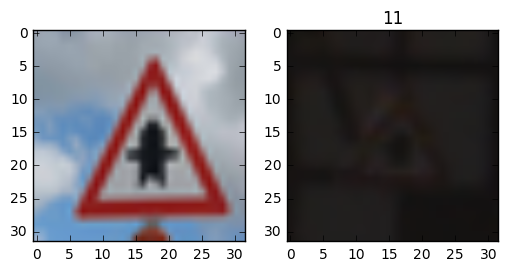

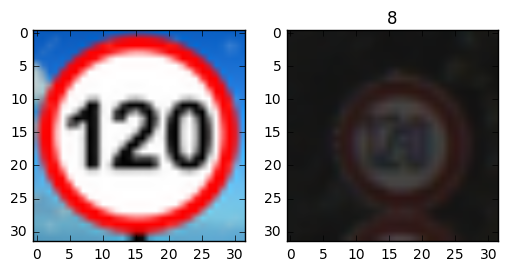

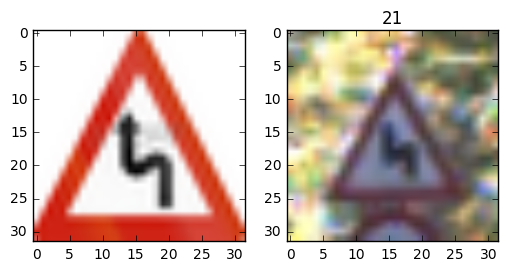

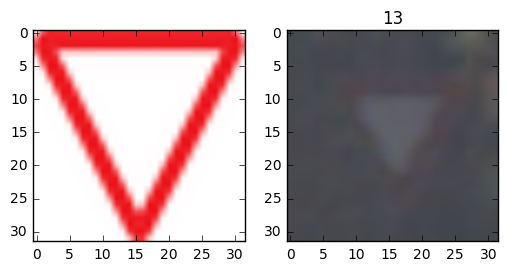

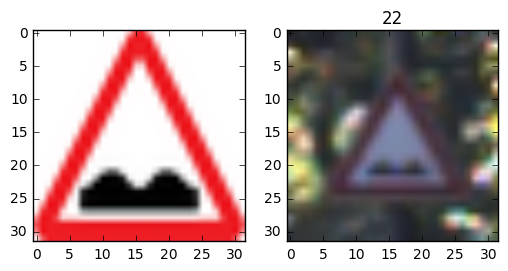

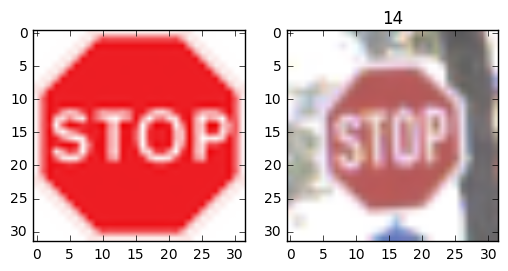

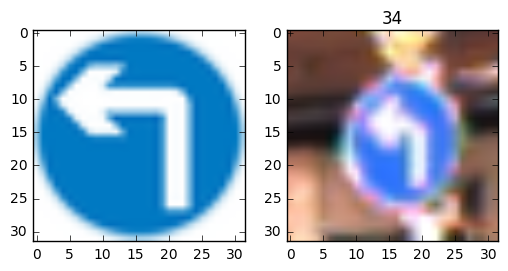

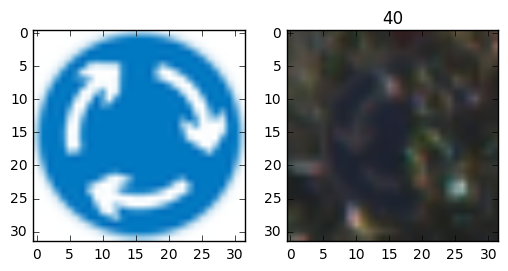

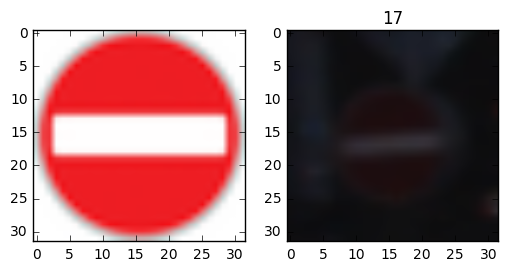

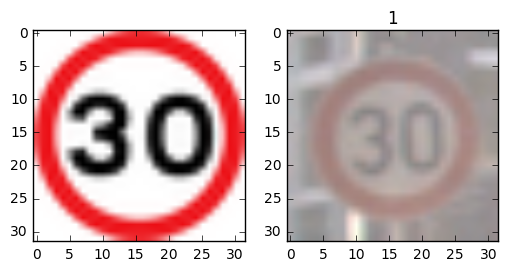

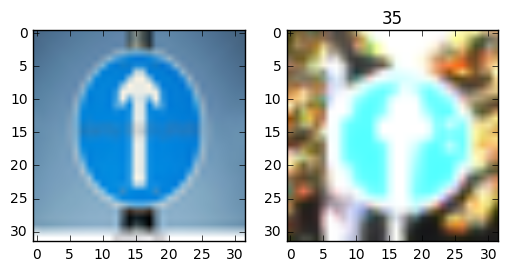

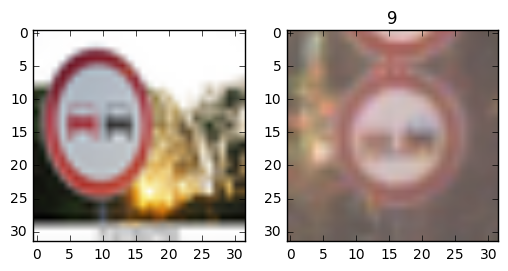

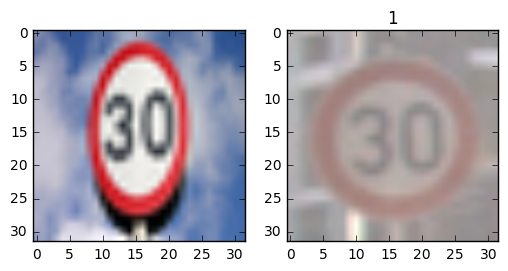

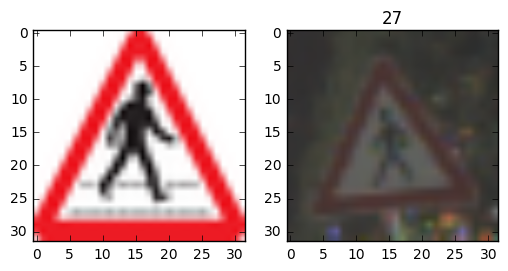

In [94]:
from PIL import Image
import glob
from numpy import array

images = []

for filename in glob.glob('/Users/NSN/Downloads/hi/*.jpg'): #assuming gif
    img=Image.open(filename)
    img = img.resize((32, 32),Image.ANTIALIAS)
    images.append(img)

extra_imgs = np.zeros([len(images),32,32,3], dtype=np.uint8)
for i in range(len(images)):
    extra_imgs[i]=array(images[i])


extra_labels = [11,8,21,13,22,14,34,40,17,1,35,9,1,27]

for index in range(len(extra_labels)):
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    
    plt.imshow(extra_imgs[index])
    
    #display an image from the training set that matches
    
    img_val = extra_labels[index]
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])
    plt.show()



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

1- Random images were selected from diiferent online sources

2- No special attention was paid on the type/style/quality of the downlaoded images as the main aim was to check the robustness of the model on any kind of image

3- Image size was reduced to (32 x 32 x 3)

4- signnames.csv was used to label the new images 



In [87]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
### Run the predictions here.
### Feel free to use as many code cells as needed.
extra_imgs_norm = normalize(extra_imgs)
extra_labels_OHE = oneHotEncode_labels(extra_labels)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

pred_val = tf.argmax(logits, 1)

pred_softmax = tf.nn.softmax(logits)
pred_topFive = tf.nn.top_k(pred_softmax, k=5)

with tf.Session() as sess:
    
    # Restore variables from disk.
    saver.restore(sess, "traffic_signs.ckpt")
    print("Model restored.")
    
    soln_vals, soln_topFive = sess.run([pred_val, pred_topFive], feed_dict={x_image:extra_imgs_norm, keep_prob: 1.})

    
print('soln_vals: ', soln_vals)

Model restored.
soln_vals:  [11 40 21 13 22 14 34 40 17  1 35  4  5 18]


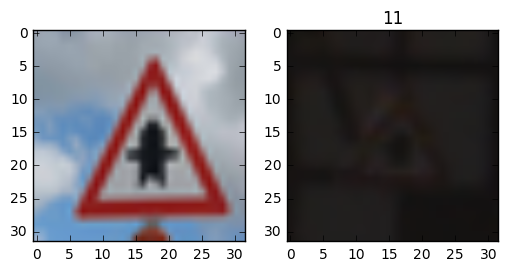

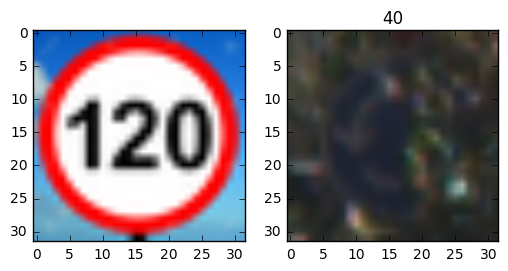

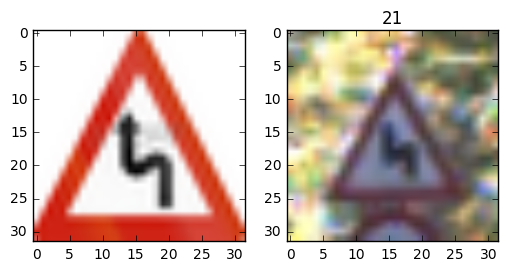

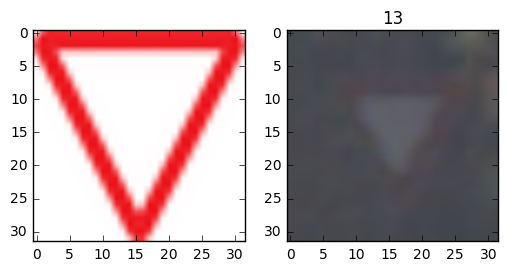

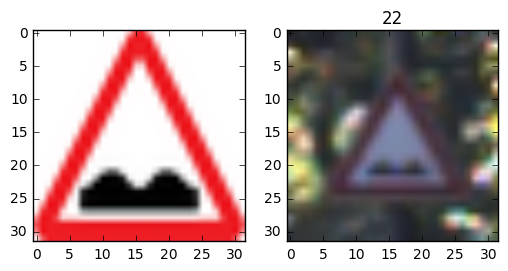

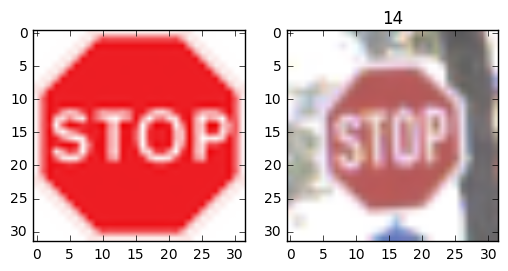

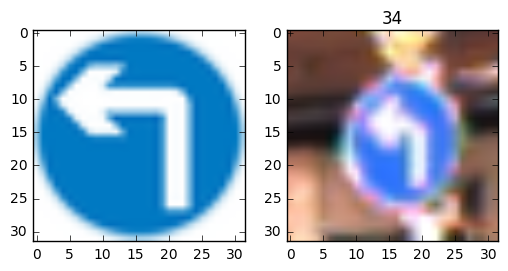

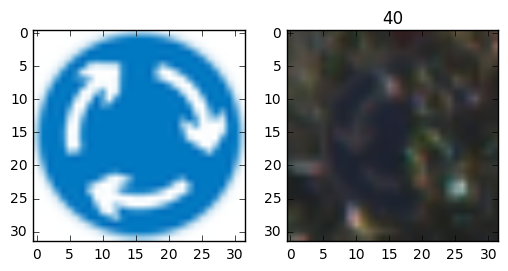

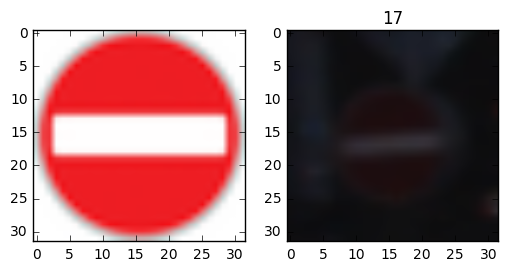

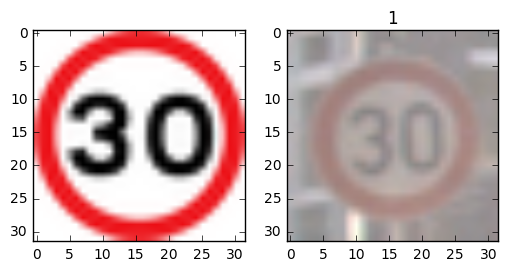

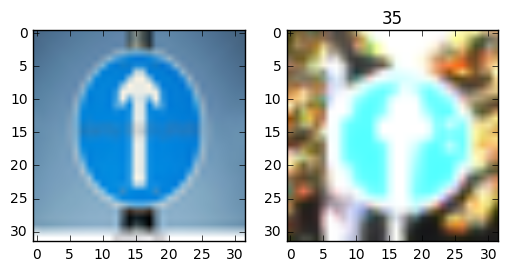

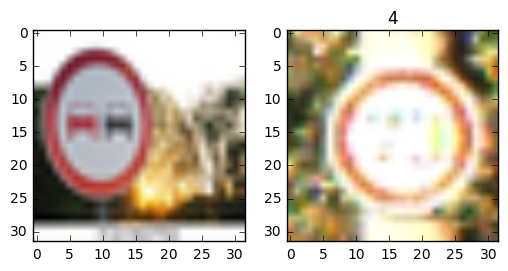

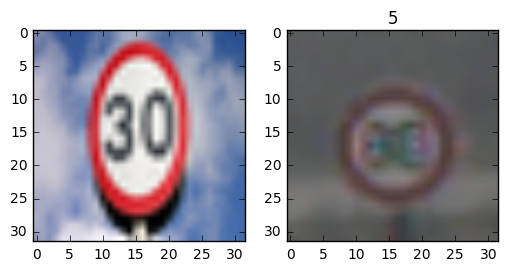

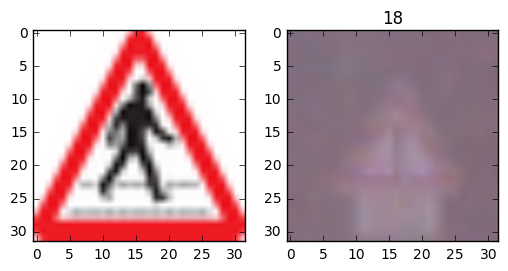

In [85]:
# display the result

for index in range(len(extra_labels)):
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    
    plt.imshow(extra_imgs[index])
    
    #display an image from the training set that matches
    
    # display an image from the training set that matches
    img_val = soln_vals[index]
    training_index = next(index for index, val in enumerate(y_train) if val==img_val)
    a=fig.add_subplot(1,2,2)
    a.set_title(str(img_val))
    plt.imshow(X_train[training_index])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The coloured images model performed fairly ok considering that no attention was paid on what kind of new images were used to check the accuracy

10/14 (~70 %) of the images  were correctly identified

120 kmph and 30 kmph Images that were incorrectly identified , both had blue background which could have played a role in the error

Similarly the image of No Passing incorrectly identified has the same background as the 70kmph image that the model correlated it against

Hence it can be concluded that the background effect plays an important role in the identification of the images

The incorrect classification of the pedestian image can be attributed to the fact the image used for tarining is a mirror image of the sign

The prediction of the grayscale model is shown in a seperate notebook

Besides the points you made, I would like to share few factors that might affect the classification difficulties as well. Hope it could inspire you more on this topic.

1.The Contrast of the image.
2.The Angle of the traffic sign.
3.Image might be jittered.
4.The training data set does not include this traffic sign.
5.Background Objects.

From the prediction I did to the candidate image, the testing accuracy is 65%, however, the model prediction accuracy on the training set was 92%.
As a result, I believe my model did not perform well in the real world situation. The possible reasons would be .......



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [93]:
topFive_values = soln_topFive.values
topFive_indices = soln_topFive.indices

print(topFive_indices)

print('True Labels',extra_labels)


[[11 28 18 30 29]
 [40 11  5  0  1]
 [21 18 24 31  1]
 [13  0  1  2  3]
 [22 25 24 38 29]
 [14  5  1 15  2]
 [34 38 40 12 13]
 [40 12 35 34 37]
 [17  1  2 15 26]
 [ 1 12 40 21 36]
 [35 36  0  1  2]
 [ 4  2 40  7 37]
 [ 5  1 16  9 15]
 [18 27 24  4 26]]
True Labels [11, 8, 21, 13, 22, 14, 34, 40, 17, 1, 35, 9, 1, 27]


**Answer:**

The correct prediction occurs only for the last two images in the top 5 predictions

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.